# Help Functions


In [45]:
# setup vitz
from IPython.core.display import HTML
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt


# adjust jupyter notebook viz|
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np 

In [2]:
dados = ("https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv")
df = pd.read_csv(dados)

# 1.0 Descricao dos dados


In [8]:
# copiando os dados para sessao
df1 = df.copy()


In [9]:
df1.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [10]:
df1.sample(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
36841,190002483655,2019,3547809,Santo André,35,SP,17,M,0,1,1,3529401.0,Mauá,35.0,SP,2,0,2,1.0,0,35008357.0,3547809.0,Santo André,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDCABDBABDCECDEABCCCACDEAACDABDAADCADBEAACDB,BDACE99999DCBABDDBBEDAAECCEABDDCBCCBEBDAADAEBD...,ABDECEAADDCBBECABDBBCEBCADDEECADEBBDDECECEDBD,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,140.0,100.0,100.0,580.0,H,D,D,B,3,E,A,B,C,A,A,B,B,B,B,A,A,A,A,A,A,D,A,C,B
3408,190001139317,2019,2304400,Fortaleza,23,CE,18,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,2,1.0,0,23073918.0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,ABACAEDCACAACBCEEEBBEDBBECBDCECDDABCCADBBBABB,99999CADCDDBCEBACACEEBDABDAAECADAEDCAABEBEECCD...,DCACCEBDBACEDBACECECDBABDADEADABDBCDACBADEEAB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,140.0,140.0,640.0,H,H,B,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
57457,190003301696,2019,3550308,São Paulo,35,SP,17,F,1,1,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,35005368.0,3550308.0,São Paulo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,CBABADBDAEEEACDBCCAAEDBBABEDBACCBEEBDECABDCEC,BCEDA99999CCABEBEDCDCBDCDEDABCCBEBEADDAEECBCCA...,ECADEBBBADCBADCBCEADBBAEBE.EDCBCEBEDDCEBABBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,180.0,200.0,180.0,160.0,160.0,880.0,D,E,C,D,5,D,A,B,D,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B
127332,190006117488,2019,3304557,Rio de Janeiro,33,RJ,19,F,1,2,1,3304557.0,Rio de Janeiro,33.0,RJ,2,0,2,1.0,0,33134049.0,3304557.0,Rio de Janeiro,33.0,RJ,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DBAAADBECAADCDEBECBDADBBCDDEABCAEDBBDBBACEEBC,DDCDD99999CBADBBBCDECBBBBBDBEBBBEBDAADCEECACCA...,CBDDCCDDCDBBEEBBBEACCDDABDCAAAAAEEEBCAEDDBCEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,160.0,100.0,120.0,140.0,620.0,E,C,B,B,5,H,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,D,B,A,B
18288,190001731321,2019,4314407,Pelotas,43,RS,36,F,1,1,1,4314407.0,Pelotas,43.0,RS,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CADDCAEEBCBEADADBCAEECEBECBEEBDEEBBEAEEEEBECB,AEBAE99999CABCBDAAD*DBDCAACECECEDDBAECAABBAAEA...,BABCABECBEBEBCABCBEAAABCCCEECDDACBEACEAABCCDC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,80.0,60.0,100.0,60.0,400.0,B,C,B,B,3,E,A,B,C,B,A,B,A,B,A,A,A,A,C,A,A,E,A,A,B
86826,190004469297,2019,120

In [15]:
# print a dimensao dos dados
print('Numbers of Rows {}'. format(df1.shape[0]))
print('Numbers of Columns {}'. format(df1.shape[1]))

Numbers of Rows 127380
Numbers of Columns 136


In [12]:
df1.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [20]:
# Tipos dos dados
df1.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
CO_UF_RESIDENCIA            int64
                            ...  
Q021                       object
Q022                       object
Q023                       object
Q024                       object
Q025                       object
Length: 136, dtype: object

In [23]:
df1[['TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_ESCOLA']].head()

,TP_COR_RACA,TP_NACIONALIDADE,CO_ESCOLA
0,3,1,NaN
1,3,1,NaN
2,1,1,NaN
3,3,1,NaN
4,3,1,NaN


In [24]:
# visualizando NAS

df1.isna().sum()

NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q021                       0
Q022                       0
Q023                       0
Q024                       0
Q025                       0
Length: 136, dtype: int64

In [25]:
df1.CO_ESCOLA.isna().sum()

98753

In [26]:
df1.NU_IDADE.value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [27]:
# Ordenar por indice *(idades)
df1.NU_IDADE.value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [28]:
df['%'] = 100 * df['NU_IDADE'] / df.groupby('NU_IDADE')['NU_IDADE'].transform('sum')


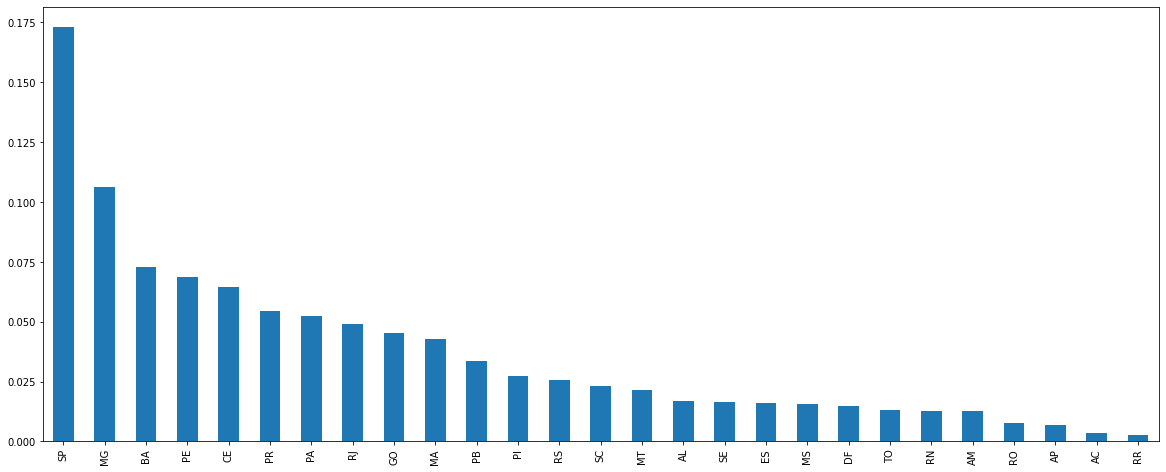

In [52]:

# Desafio 2 porporcao de alunos menores de 17 anos
alunons_menor_17  = df1.query('NU_IDADE < 17')
alunons_menor_17['SG_UF_RESIDENCIA'].value_counts(normalize = True).plot.bar( figsize = (20,8))


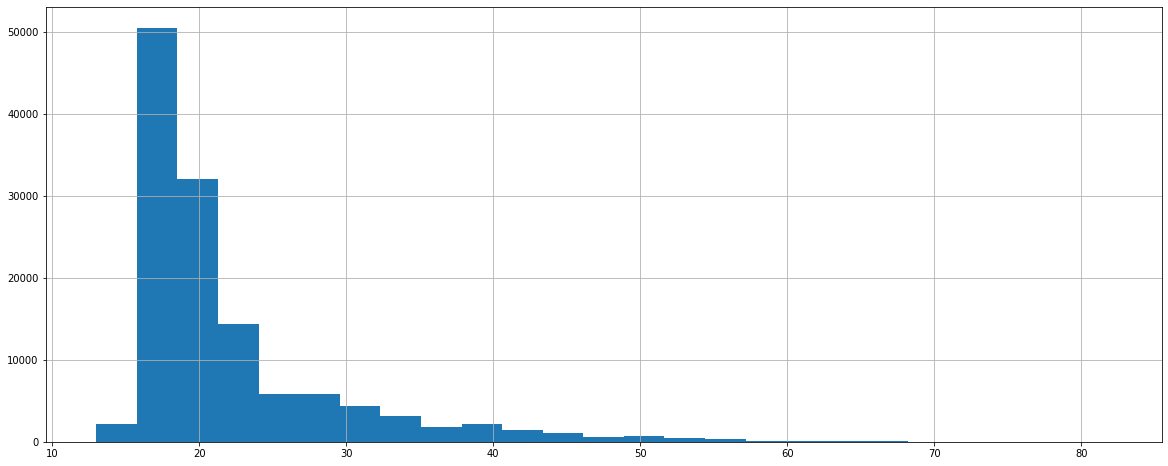

In [55]:
df1['NU_IDADE'].hist( bins = 25, figsize = (20,8)) 

In [59]:
# Idade doa alunos  Treineiros
# retornar treineiros == 1 e coluna Idade
df1.query('IN_TREINEIRO == 1')['NU_IDADE'].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

In [ ]:
# DESAFIO > plotar o histograma de Treineiro e Nao treineiro, um em cima do outro.

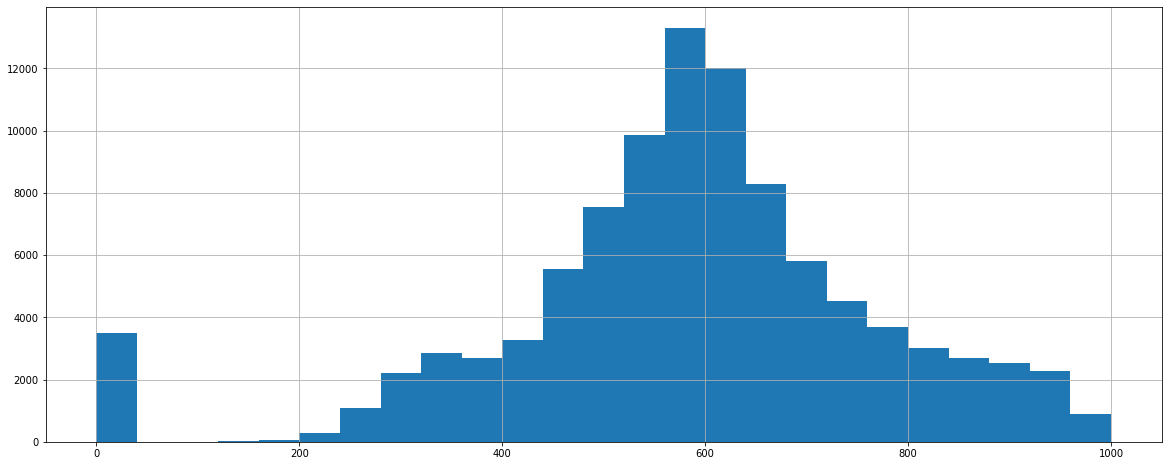

In [62]:
# Distribuicao de nota de redacao
df1['NU_NOTA_REDACAO'].hist( bins=25,  figsize = (20,8))

In [ ]:
# comparrar as distribuicoes entre as provas em ingels e Espanhol

# necessario fazer um query para cada grupoo de pessoas que fez prob=vas em ingles e esoanhol, e deppois plotar

# Explorar matplot e Pandas com graficos novos.